In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import preprocessing

In [2]:
df=pd.read_csv('gait.csv')

In [3]:
df

,uid,activity,time,ax,ay,az,wx,wy,wz,angleX,angleY,angleZ,temp
0,1,walkontoe,2659897,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,1,walkontoe,2659898,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,1,walkontoe,2659898,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,1,walkontoe,2659898,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,1,walkontoe,2659898,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72152,10,jogging,2203275,-0.0605,0.2568,1.7686,27.9541,18.6157,3.4790,-26.6583,65.1270,-60.5402,35.4594
72153,10,jogging,2203275,-0.0293,0.3091,1.8848,32.5317,55.9082,-48.8281,-27.8174,65.4071,-62.1716,35.4711
72154,10,jogging,2203275,-0.0313,0.3633,2.0269,72.6929,60.1196,-56.8237,-28.8007,65.6763,-64.0558,35.4653
72155,10,jogging,2203275,-0.0479,0.4219,2.1865,126.4648,21.5454,-28.4424,-28.3173,65.7257,-64.9127,35.4505


In [4]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

ax        3
ay        3
az        3
wx        3
wy        3
wz        3
angleX    3
angleY    3
angleZ    3
temp      3
dtype: int64

In [5]:
print(df[df.isnull().any(axis=1)][null_columns].head())

       ax  ay  az  wx  wy  wz  angleX  angleY  angleZ  temp
25986 NaN NaN NaN NaN NaN NaN     NaN     NaN     NaN   NaN
41635 NaN NaN NaN NaN NaN NaN     NaN     NaN     NaN   NaN
45496 NaN NaN NaN NaN NaN NaN     NaN     NaN     NaN   NaN


In [6]:
df.dropna(axis=0, how='any', inplace=True)
df[null_columns].isnull().sum()

ax        0
ay        0
az        0
wx        0
wy        0
wz        0
angleX    0
angleY    0
angleZ    0
temp      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72154 entries, 0 to 72156
Data columns (total 13 columns):
uid         72154 non-null int64
activity    72154 non-null object
time        72154 non-null int64
ax          72154 non-null float64
ay          72154 non-null float64
az          72154 non-null float64
wx          72154 non-null float64
wy          72154 non-null float64
wz          72154 non-null float64
angleX      72154 non-null float64
angleY      72154 non-null float64
angleZ      72154 non-null float64
temp        72154 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 7.7+ MB


[]

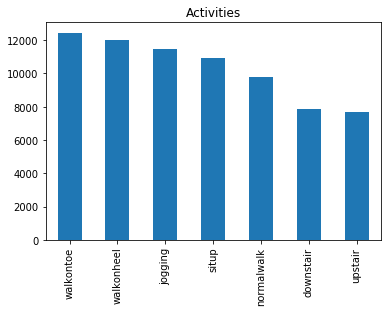

In [8]:
df['activity'].value_counts().plot(kind = 'bar', title = "Activities")
plt.plot()

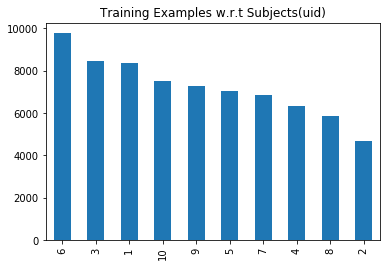

In [9]:
df['uid'].value_counts().plot(kind='bar',title='Training Examples w.r.t Subjects(uid)')
plt.show()

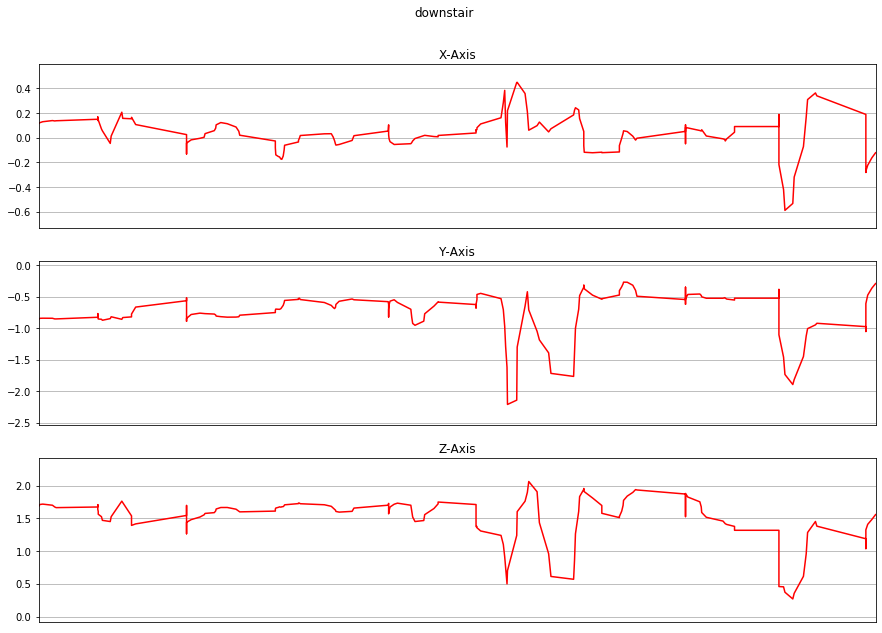

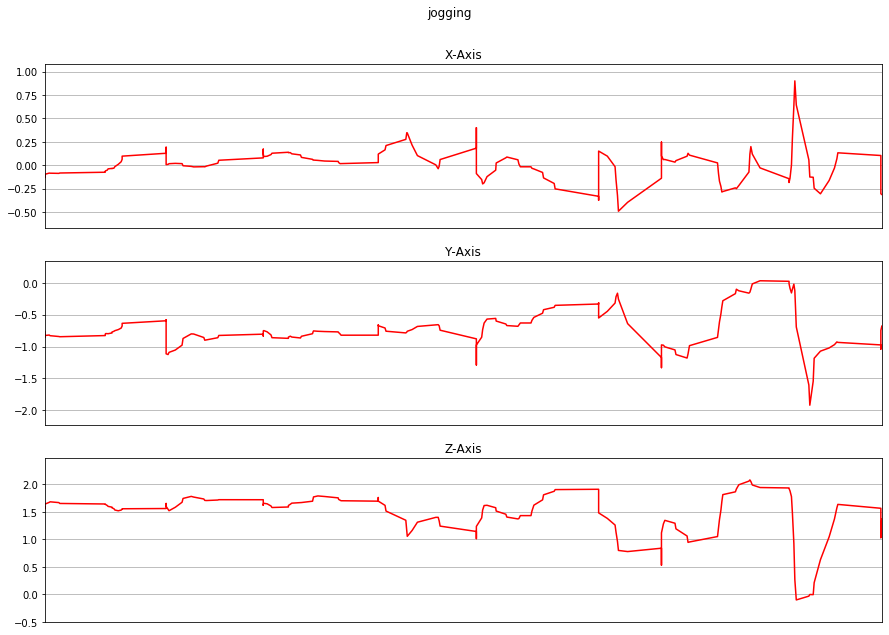

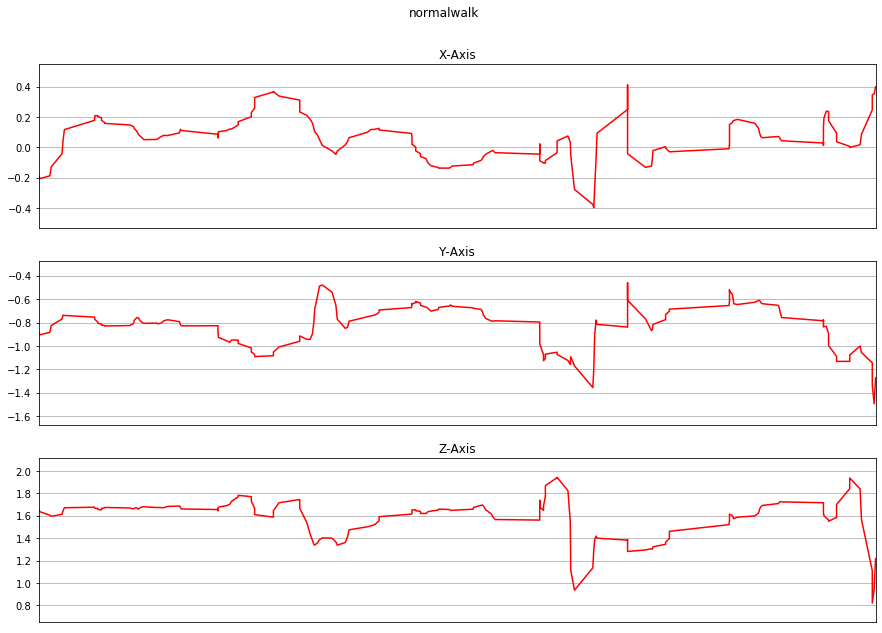

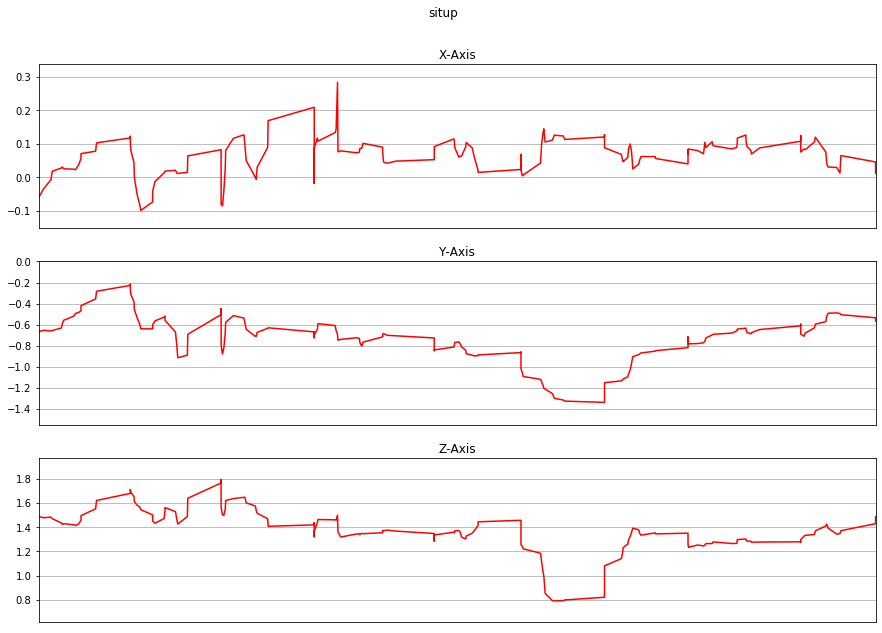

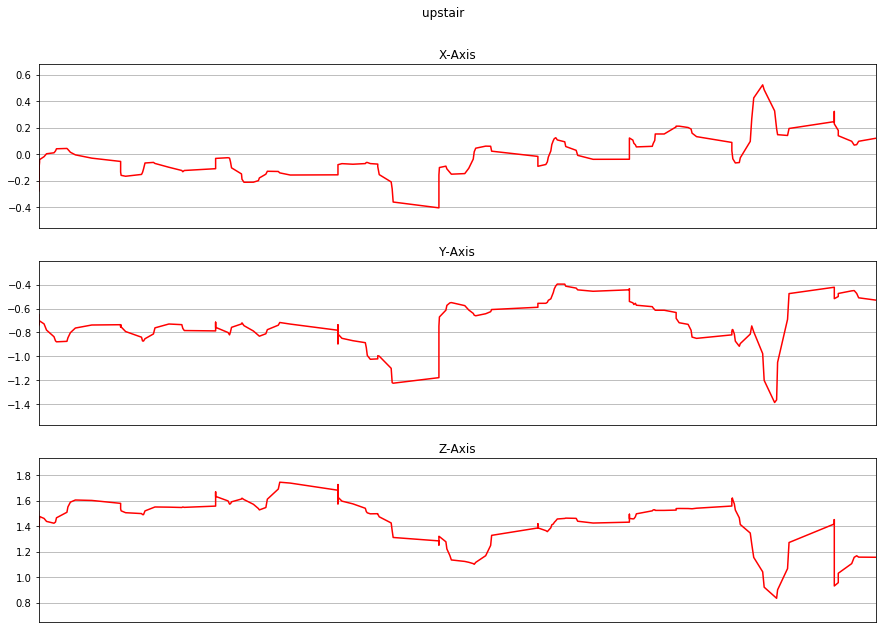

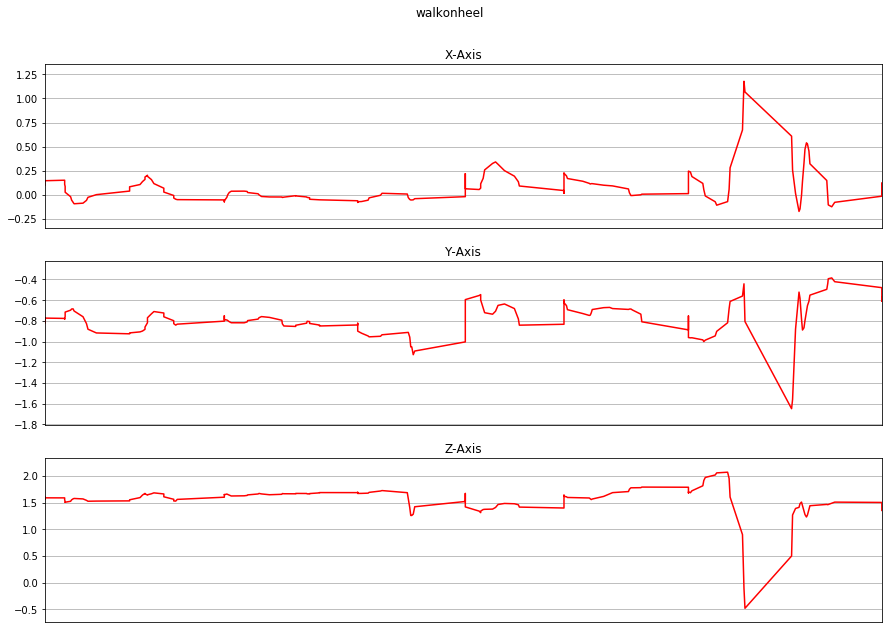

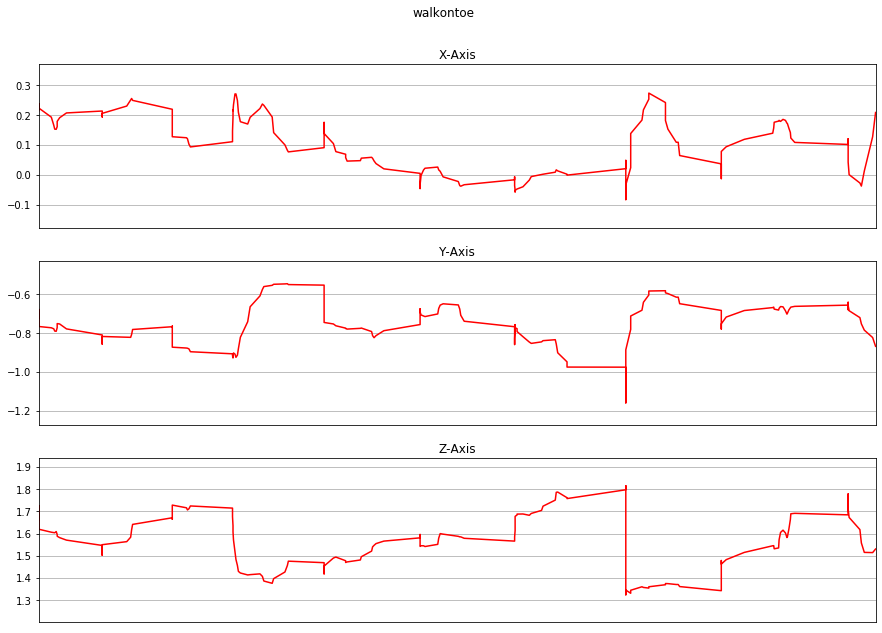

In [10]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['time'], data['ax'], 'X-Axis')
    plot_axis(ax1, data['time'], data['ay'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['az'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(df['activity']):
    subset = df[df['activity'] == activity][:180]
    plot_activity(activity, subset)

In [11]:
df

,uid,activity,time,ax,ay,az,wx,wy,wz,angleX,angleY,angleZ,temp
0,1,walkontoe,2659897,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,1,walkontoe,2659898,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,1,walkontoe,2659898,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,1,walkontoe,2659898,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,1,walkontoe,2659898,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72152,10,jogging,2203275,-0.0605,0.2568,1.7686,27.9541,18.6157,3.4790,-26.6583,65.1270,-60.5402,35.4594
72153,10,jogging,2203275,-0.0293,0.3091,1.8848,32.5317,55.9082,-48.8281,-27.8174,65.4071,-62.1716,35.4711
72154,10,jogging,2203275,-0.0313,0.3633,2.0269,72.6929,60.1196,-56.8237,-28.8007,65.6763,-64.0558,35.4653
72155,10,jogging,2203275,-0.0479,0.4219,2.1865,126.4648,21.5454,-28.4424,-28.3173,65.7257,-64.9127,35.4505


In [12]:
df=df.drop(['uid', 'time','temp'], axis = 1)

In [13]:
df

,activity,ax,ay,az,wx,wy,wz,angleX,angleY,angleZ
0,walkontoe,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931
1,walkontoe,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854
2,walkontoe,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777
3,walkontoe,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589
4,walkontoe,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237
...,...,...,...,...,...,...,...,...,...,...
72152,jogging,-0.0605,0.2568,1.7686,27.9541,18.6157,3.4790,-26.6583,65.1270,-60.5402
72153,jogging,-0.0293,0.3091,1.8848,32.5317,55.9082,-48.8281,-27.8174,65.4071,-62.1716
72154,jogging,-0.0313,0.3633,2.0269,72.6929,60.1196,-56.8237,-28.8007,65.6763,-64.0558
72155,jogging,-0.0479,0.4219,2.1865,126.4648,21.5454,-28.4424,-28.3173,65.7257,-64.9127


In [14]:
from sklearn.utils import shuffle
df = shuffle(df)

#Train-Test Spillting
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(df,test_size=0.15,random_state=42)

In [15]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:61330
Rows in test set:10824



In [16]:
train_set_labels=train_set['activity'].copy()
train_set=train_set.drop('activity',axis=1).copy()
test_set_labels=test_set['activity'].copy()
test_set=test_set.drop('activity',axis=1).copy()

In [17]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set = scaler.fit_transform(train_set)
scaler = MinMaxScaler(feature_range=(-1, 1))
test_set = scaler.fit_transform(test_set)

In [18]:
#Spiltting into Train, Validation and Test
train_set,val_set,train_set_labels,val_set_labels=train_test_split(train_set,train_set_labels,test_size=0.10,random_state=42)

In [19]:
print(f"Rows in train set:{len(train_set)}\nRows in validation set:{len(test_set)}\nRows in test set:{len(val_set)}\n")

Rows in train set:55197
Rows in validation set:10824
Rows in test set:6133



In [20]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
train_set_labels = LabelEncoder().fit_transform(train_set_labels)
val_set_labels = LabelEncoder().fit_transform(val_set_labels)
test_set_labels = LabelEncoder().fit_transform(test_set_labels)


# Extreme Learning Machine (ELM) implementation

ELM Training Accuracy 0.729 
ELM Validation Accuracy 0.692 
ELM Testing Accuracy 0.515 


/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       664
           1       0.83      0.70      0.76       933
           2       0.59      0.74      0.65       873
           3       0.81      0.90      0.85       956
           4       0.67      0.82      0.74       642
           5       0.66      0.75      0.70      1049
           6       0.65      0.75      0.70      1016

    accuracy                           0.69      6133
   macro avg       0.60      0.67      0.63      6133
weighted avg       0.62      0.69      0.65      6133



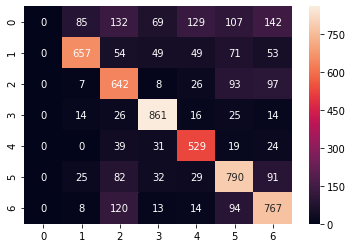

In [21]:
from elm import ELM
elm = ELM(hid_num=5000).fit(train_set, train_set_labels)
print("ELM Training Accuracy %0.3f " % elm.score(train_set,train_set_labels))
print("ELM Validation Accuracy %0.3f " % elm.score(val_set,val_set_labels))
print("ELM Testing Accuracy %0.3f " % elm.score(test_set,test_set_labels))
validation_prediction=elm.predict(val_set)
print(classification_report(val_set_labels, validation_prediction))
sns.heatmap(confusion_matrix(val_set_labels, validation_prediction),annot=True,fmt="d")

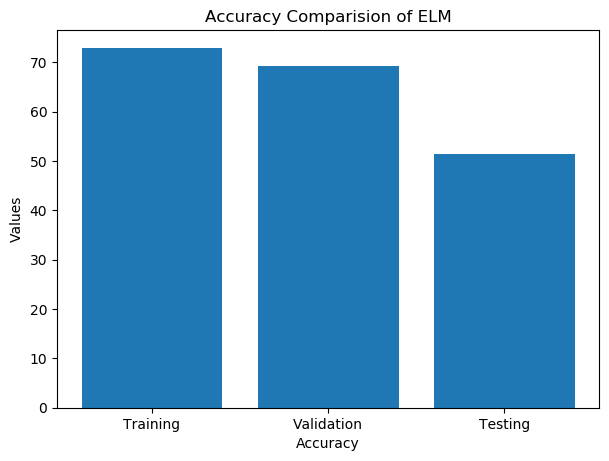

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
a=elm.score(train_set,train_set_labels)*100
b=elm.score(val_set,val_set_labels)*100
c=elm.score(test_set,test_set_labels)*100
y=[a,b,c]
x=['Training','Validation','Testing']
plt.bar(x,y)
plt.xlabel('Accuracy')
plt.ylabel("Values")
plt.title('Accuracy Comparision of ELM')
plt.show()

# # Ensemble Learning (Random Forest Classifier)

Random Forest Training Score: 
 100.0
Random Forest Validation Score: 
 98.24
Random Forest Test Score: 
 70.63
Accuracy: 
 0.9823903473014838
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       664
           1       0.97      0.98      0.98       933
           2       0.99      0.98      0.98       873
           3       0.98      0.99      0.98       956
           4       1.00      1.00      1.00       642
           5       0.98      0.97      0.97      1049
           6       0.98      0.98      0.98      1016

    accuracy                           0.98      6133
   macro avg       0.98      0.98      0.98      6133
weighted avg       0.98      0.98      0.98      6133



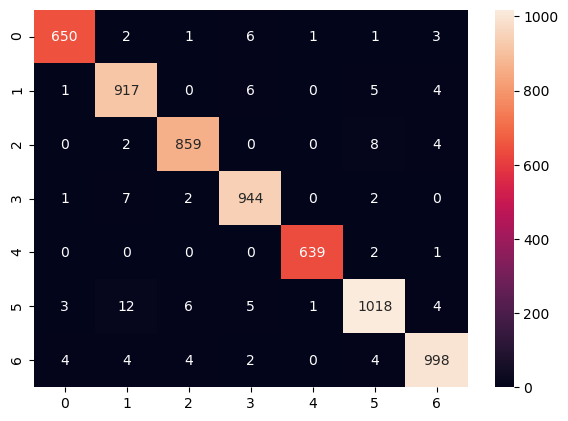

In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_set, train_set_labels)
#Predict Output
rf_predicted = random_forest.predict(val_set)
random_forest_score = round(random_forest.score(train_set, train_set_labels) * 100, 2)
random_forest_score_val =round(random_forest.score(val_set, val_set_labels) * 100, 2)
random_forest_score_test = round(random_forest.score(test_set, test_set_labels) * 100, 2)
print('Random Forest Training Score: \n', random_forest_score)
print('Random Forest Validation Score: \n', random_forest_score_val)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,rf_predicted))
print(classification_report(val_set_labels,rf_predicted))
sns.heatmap(confusion_matrix(val_set_labels,rf_predicted),annot=True,fmt="d")

# Multilayer Perceptron (ANN)

MLP classifier Training Score: 
 86.62
MLP classifier Validation Score: 
 86.27
MLP classifier Test Score: 
 71.36
Accuracy: 
 0.8627099298874938
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       664
           1       0.93      0.89      0.91       933
           2       0.83      0.88      0.85       873
           3       0.93      0.88      0.91       956
           4       0.93      0.88      0.90       642
           5       0.81      0.82      0.81      1049
           6       0.81      0.84      0.83      1016

    accuracy                           0.86      6133
   macro avg       0.87      0.86      0.87      6133
weighted avg       0.86      0.86      0.86      6133



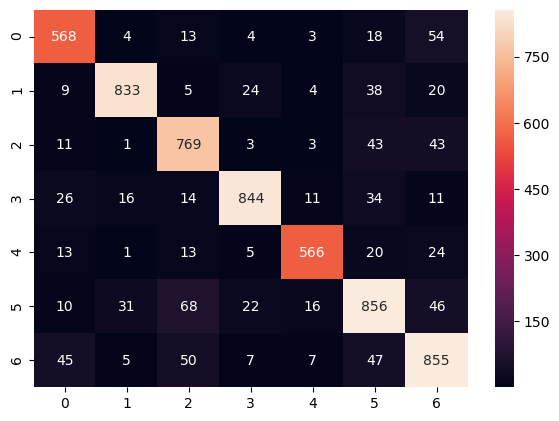

In [24]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='tanh', max_iter=500, alpha=1e-4,
                     solver='lbfgs', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(train_set,train_set_labels)
#Predict Output 
y_pred = clf.predict(val_set)
mlp_score = round(clf.score(train_set, train_set_labels) * 100, 2)
mlp_score_test = round(clf.score(test_set, test_set_labels) * 100, 2)
mlp_score_val =  round(clf.score(val_set, val_set_labels) * 100, 2)
print('MLP classifier Training Score: \n', mlp_score)
print('MLP classifier Validation Score: \n', mlp_score_val)
print('MLP classifier Test Score: \n', mlp_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,y_pred))
print(classification_report(val_set_labels,y_pred))
sns.heatmap(confusion_matrix(val_set_labels,y_pred),annot=True,fmt="d")

# SVM Classifier

/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Training Score: 
 39.57
SVM Validation Score: 
 38.87
SVM Test Score: 
 40.9
Accuracy: 
 0.38871677808576555
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.45      0.58       664
           1       0.57      0.41      0.48       933
           2       0.69      0.15      0.24       873
           3       0.67      0.23      0.34       956
           4       0.77      0.18      0.30       642
           5       0.24      0.84      0.38      1049
           6       0.43      0.35      0.39      1016

    accuracy                           0.39      6133
   macro avg       0.60      0.37      0.39      6133
weighted avg       0.57      0.39      0.38      6133



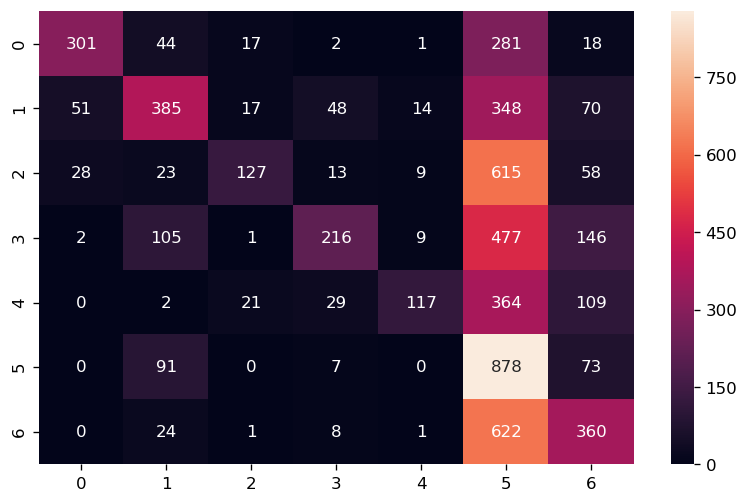

In [27]:
from sklearn.svm import SVC
svc = SVC()
# Train the model using the training sets and check score
svc.fit(train_set, train_set_labels)
#Predict Output
svc_predicted= svc.predict(val_set)
svc_score = round(svc.score(train_set, train_set_labels) * 100, 2)
svc_score_val = round(svc.score(val_set, val_set_labels) * 100, 2)
svc_score_test = round(svc.score(test_set, test_set_labels) * 100, 2)
print('SVM Training Score: \n', svc_score)
print('SVM Validation Score: \n', svc_score_val)
print('SVM Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(val_set_labels,svc_predicted))
print('Classification Report: \n', classification_report(val_set_labels,svc_predicted))

sns.heatmap(confusion_matrix(val_set_labels,svc_predicted),annot=True,fmt="d")

# Model Comparision

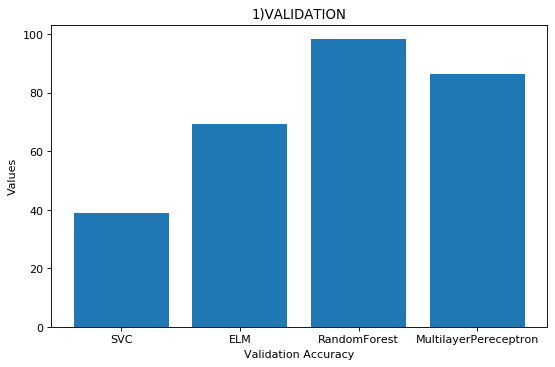

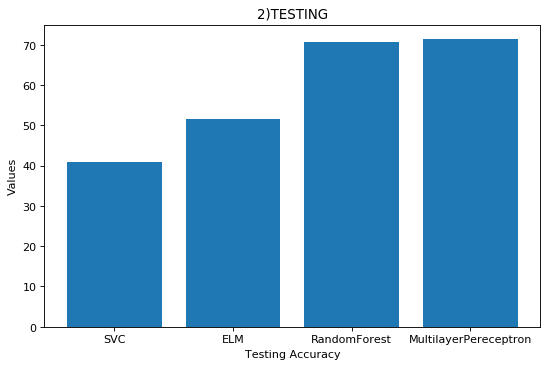

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':80})
a=svc_score_val
b=round(elm.score(val_set,val_set_labels)*100,2)
c=random_forest_score_val
d=mlp_score_val
y=[a,b,c,d]
x=['SVC','ELM','RandomForest','MultilayerPereceptron']
plt.bar(x,y)
plt.xlabel('Validation Accuracy')
plt.ylabel("Values")
plt.title('1)VALIDATION')
plt.show()
a=svc_score_test
b=round(elm.score(test_set,test_set_labels)*100,2)
c=random_forest_score_test
d=mlp_score_test
y=[a,b,c,d]
plt.bar(x,y)
plt.xlabel('Testing Accuracy')
plt.ylabel("Values")
plt.title('2)TESTING')
plt.show()

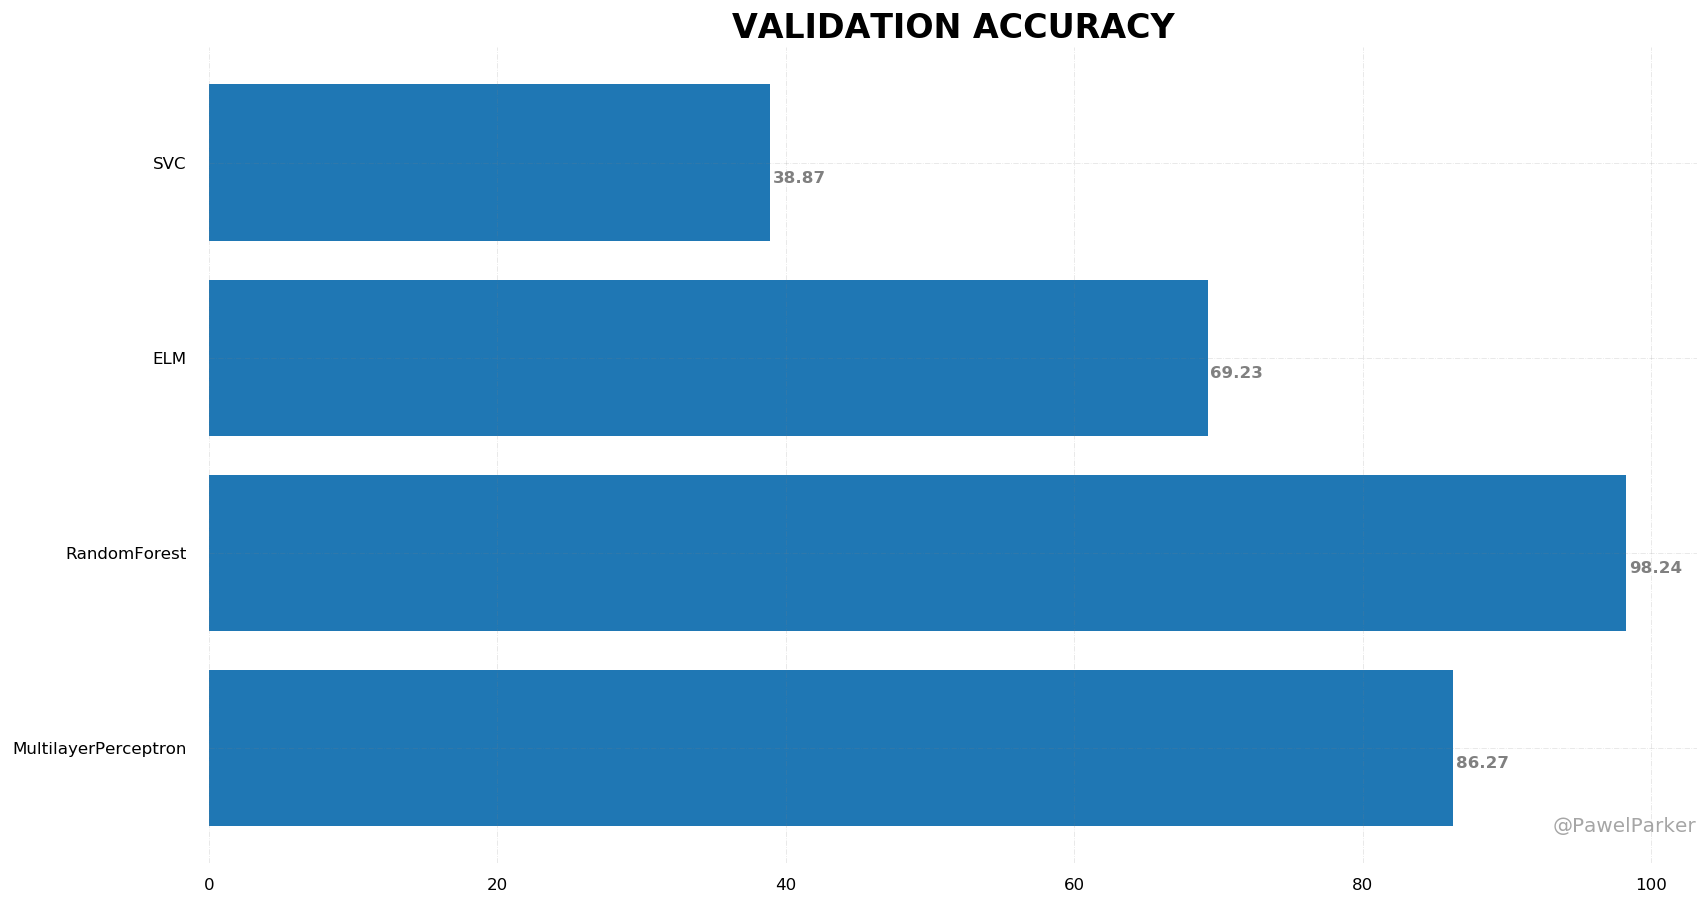

In [30]:
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
a=svc_score_val
b=round(elm.score(val_set,val_set_labels)*100,2)
c=random_forest_score_val
d=mlp_score_val
y=[a,b,c,d]
x=['SVC','ELM','RandomForest','MultilayerPerceptron'] 
ax.barh(x,y)  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')   
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)  
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)  
ax.invert_yaxis() 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
ax.set_title('VALIDATION ACCURACY', 
             loc ='center',fontsize = 20, fontweight ='bold' ) 
fig.text(0.9, 0.15, '@PawelParker', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
plt.show() 